
Joint Probability Matrix P(X,Y):
[[0.4 0.1]
 [0.1 0.4]]

Mutual Information I(X;Y) = 0.2781 bits


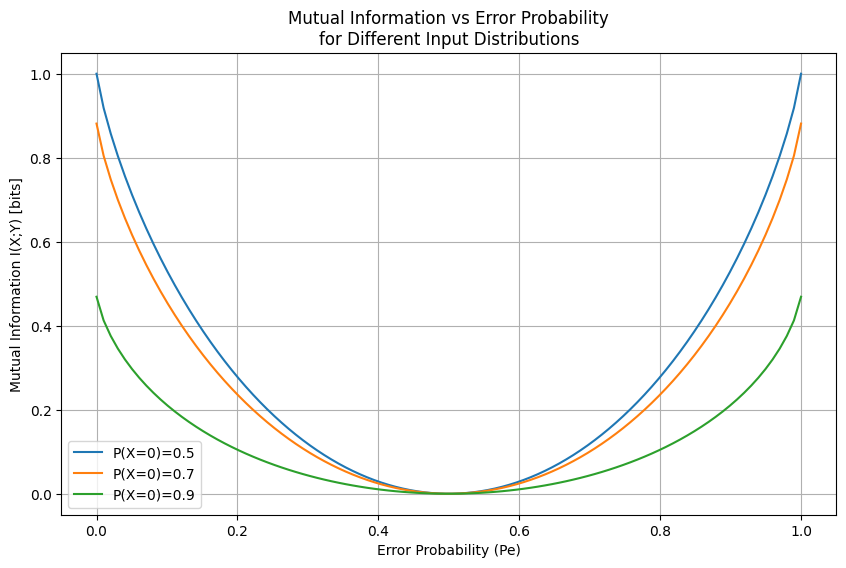

<Figure size 640x480 with 0 Axes>

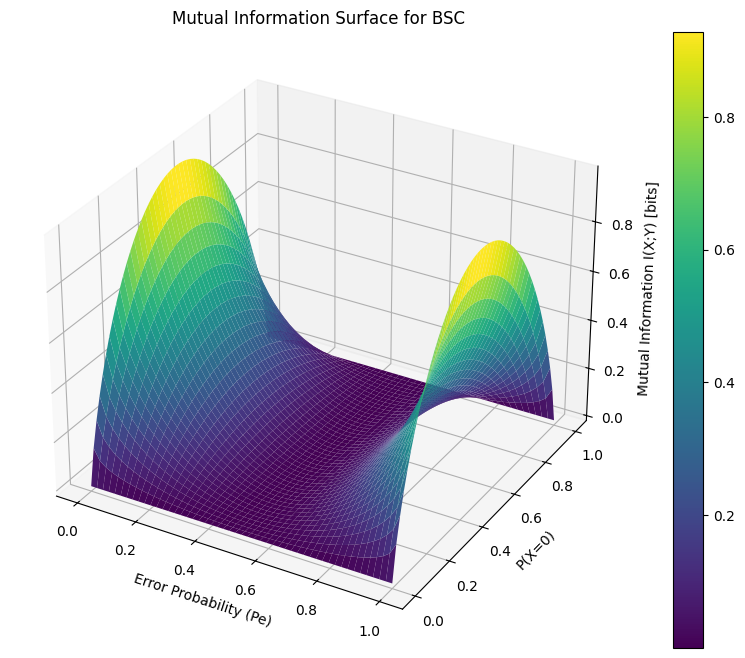

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def entropy(probabilities):
    """
    Calculate the entropy of a probability distribution.
    Handles edge cases where probability is 0 (log(0) undefined).
    """
    # Filter out zero probabilities to avoid log(0)
    valid_probs = probabilities[probabilities > 0]
    return -np.sum(valid_probs * np.log2(valid_probs))

def conditional_entropy_matrix(joint_matrix):
    """
    Calculate H(X|Y) given a joint probability matrix.
    joint_matrix[i,j] represents P(X=i, Y=j)
    """
    # Calculate P(Y) by summing columns
    py = np.sum(joint_matrix, axis=0)

    # Calculate conditional probabilities P(X|Y)
    # Using np.divide for element-wise division with 0 handling
    conditional_probs = np.divide(joint_matrix, py,
                                out=np.zeros_like(joint_matrix),
                                where=py!=0)

    # Calculate H(X|Y) = Σ P(y)H(X|Y=y)
    conditional_entropies = np.array([entropy(conditional_probs[:,j])
                                    for j in range(joint_matrix.shape[1])])
    return np.sum(py * conditional_entropies)

def mutual_information(joint_matrix):
    """
    Calculate I(X;Y) = H(X) - H(X|Y) given joint probability matrix
    """
    # Calculate P(X) by summing rows
    px = np.sum(joint_matrix, axis=1)

    # Calculate H(X)
    hx = entropy(px)

    # Calculate H(X|Y)
    hx_given_y = conditional_entropy_matrix(joint_matrix)

    return hx - hx_given_y

def create_bsc_joint_matrix(px0, pe):
    """
    Create joint probability matrix for Binary Symmetric Channel
    px0: probability of sending 0
    pe: probability of error
    """
    px1 = 1 - px0  # probability of sending 1

    # Create joint probability matrix
    # [P(X=0,Y=0) P(X=0,Y=1)]
    # [P(X=1,Y=0) P(X=1,Y=1)]
    return np.array([
        [px0 * (1-pe), px0 * pe],
        [px1 * pe, px1 * (1-pe)]
    ])

def plot_mutual_information_vs_pe():
    """
    Plot mutual information vs error probability for different input distributions
    """
    pe_values = np.linspace(0, 1, 100)
    px0_values = [0.5, 0.7, 0.9]  # Different input distributions

    plt.figure(figsize=(10, 6))

    for px0 in px0_values:
        mi_values = [mutual_information(create_bsc_joint_matrix(px0, pe))
                    for pe in pe_values]
        plt.plot(pe_values, mi_values,
                label=f'P(X=0)={px0:.1f}')

    plt.grid(True)
    plt.xlabel('Error Probability (Pe)')
    plt.ylabel('Mutual Information I(X;Y) [bits]')
    plt.title('Mutual Information vs Error Probability\nfor Different Input Distributions')
    plt.legend()
    return plt

def plot_mutual_information_surface():
    """
    Create a 3D surface plot of mutual information vs Pe and P(X=0)
    """
    pe_values = np.linspace(0, 1, 50)
    px0_values = np.linspace(0, 1, 50)
    PE, PX = np.meshgrid(pe_values, px0_values)

    # Calculate mutual information for each point
    MI = np.zeros_like(PE)
    for i, j in product(range(len(pe_values)), range(len(px0_values))):
        MI[i,j] = mutual_information(
            create_bsc_joint_matrix(px0_values[i], pe_values[j]))

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(PE, PX, MI, cmap='viridis')

    ax.set_xlabel('Error Probability (Pe)')
    ax.set_ylabel('P(X=0)')
    ax.set_zlabel('Mutual Information I(X;Y) [bits]')
    ax.set_title('Mutual Information Surface for BSC')
    fig.colorbar(surf)

    return plt

# Example usage
if __name__ == "__main__":
    # Example 1: Calculate mutual information for specific values
    pe = 0.2  # error probability
    px0 = 0.5  # probability of sending 0
    joint_matrix = create_bsc_joint_matrix(px0, pe)

    print(f"\nJoint Probability Matrix P(X,Y):")
    print(joint_matrix)

    mi = mutual_information(joint_matrix)
    print(f"\nMutual Information I(X;Y) = {mi:.4f} bits")

    # Create plots
    plot_mutual_information_vs_pe()
    plt.figure()
    plot_mutual_information_surface()
    plt.show()